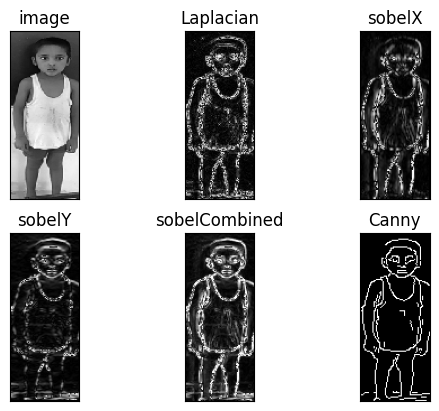

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/open_mouth_2c34b902a517427899534983057f054e2023_05_191.jpg", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,100,150)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

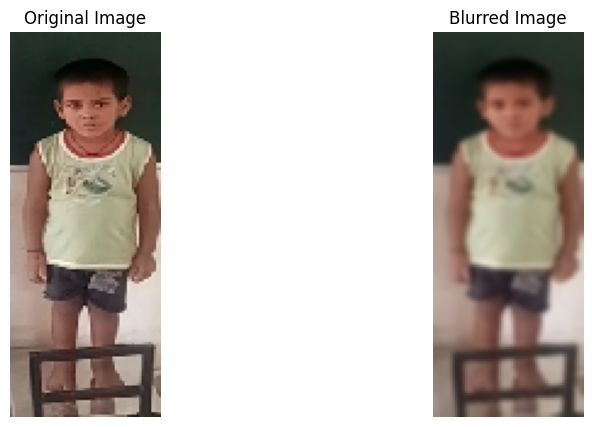

In [ ]:
import cv2
from google.colab import files
import matplotlib.pyplot as plt

def apply_gaussian_blur(image_path, kernel_size=(5, 5), sigma_x=0):
    # Load the image
    image = cv2.imread(image_path)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigmaX=sigma_x)

    return blurred_image

# Upload the image to Colab

# Get the file name of the uploaded image
image_file_name = "/content/open_mouth_d55024154e394606b6654f60f9ff89572023_59_191.jpg"

# Apply Gaussian blur to the uploaded image
blurred_image = apply_gaussian_blur(image_file_name)
# Save the blurred image
blurred_image_path = "/content/blurred_image.jpg"
cv2.imwrite(blurred_ima)

# Display the original and blurred images using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(cv2.cvtColor(cv2.imread(image_file_name), cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")
ax1.axis("off")

ax2.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Blurred Image")
ax2.axis("off")

plt.show()



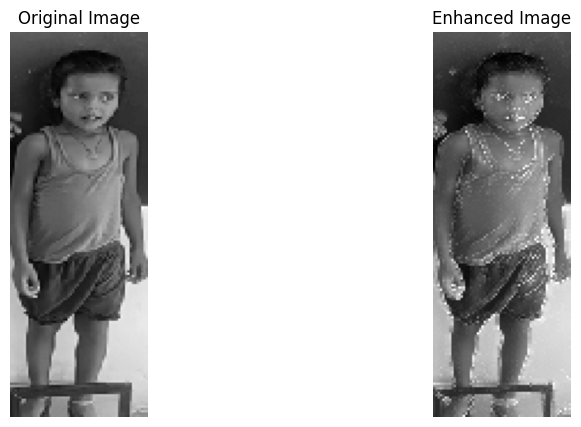

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def edge_enhancement(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply the Laplacian filter for edge enhancement
    laplacian_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    enhanced_image = cv2.filter2D(image, -1, laplacian_filter)

    # Add the original image to the enhanced image to emphasize edges
    enhanced_image = cv2.addWeighted(image, 1, enhanced_image, 1, 0)

    return enhanced_image

# Replace 'input_image.jpg' with the path to your image file
input_image_path = "/content/open_mouth_d9955b6e5d7749c281f2468f4967243f2023_04_191.jpg"

# Perform edge enhancement
enhanced_image = edge_enhancement(input_image_path)
enhanced_image_path="/content/enhanced_image_2.jpg"
cv2.imwrite(enhanced_image_path,enhanced_image)

# Display the original and enhanced images using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
ax1.set_title("Original Image")
ax1.axis("off")

ax2.imshow(enhanced_image, cmap='gray')
ax2.set_title("Enhanced Image")
ax2.axis("off")

plt.show()


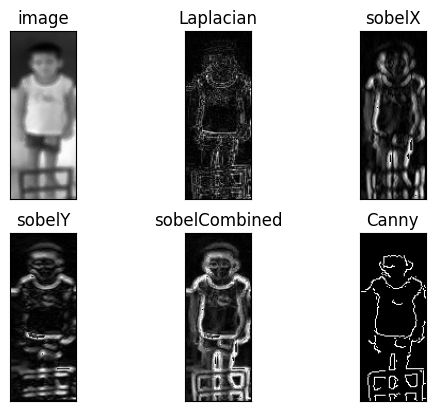

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/enhanced_image.jpg", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,100,150)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

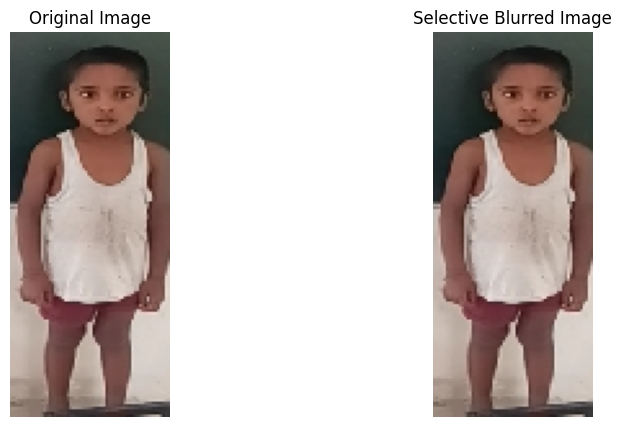

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def selective_gaussian_blur(image_path, kernel_size=(5, 5), sigma_x=0, roi_box=None):
    # Load the image
    image = cv2.imread(image_path)

    # Apply Gaussian blur to the entire image
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigmaX=sigma_x)

    if roi_box is not None:
        # Create a mask with the same size as the image, initialize it to zeros
        mask = np.zeros(image.shape[:2], dtype=np.uint8)

        # Set the ROI region in the mask to 1 (white)
        x, y, w, h = roi_box
        mask[y:y+h, x:x+w] = 1

        # Invert the mask to make the ROI region 0 and the background 1
        inverted_mask = cv2.bitwise_not(mask)

        # Apply the mask to the original and blurred images
        target_object = cv2.bitwise_and(image, image, mask=inverted_mask)
        background = cv2.bitwise_and(blurred_image, blurred_image, mask=mask)

        # Combine the target object and the blurred background
        final_image = cv2.add(target_object, background)

        return final_image

    return blurred_image

# Replace 'input_image.jpg' with the path to your image file
input_image_path = "/content/open_mouth_2c34b902a517427899534983057f054e2023_05_191.jpg"

# Define the ROI box (x, y, width, height)
roi_box = (100, 100, 200, 200)  # Example ROI box, modify as needed

# Perform selective Gaussian blur
result_image = selective_gaussian_blur(input_image_path, roi_box=roi_box)

# Display the original and selectively blurred images using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")
ax1.axis("off")

ax2.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Selective Blurred Image")
ax2.axis("off")

plt.show()


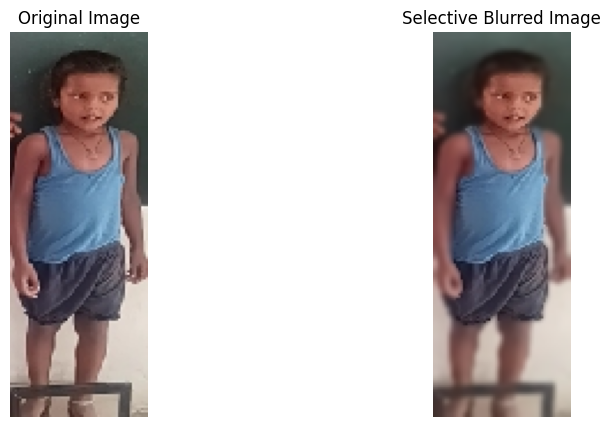

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def selective_gaussian_blur(image_path, xmin, ymin, xmax, ymax, kernel_size=(5, 5), sigma_x=0):
    # Load the image
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Set the ROI region in the mask to probable foreground (1)
    mask = np.zeros((height, width), dtype=np.uint8)
    mask[ymin:ymax, xmin:xmax] = 1

    # Set the rectangle outside ROI to probable background (3)
    mask[:ymin, :] = 3
    mask[ymax:, :] = 3
    mask[:, :xmin] = 3
    mask[:, xmax:] = 3

    # Initialize the background and foreground model samples
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Define the bounding box for the GrabCut algorithm
    rect = (xmin, ymin, xmax - xmin, ymax - ymin)

    # Run the GrabCut algorithm to refine the mask
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Update the mask: all 2 and 0 pixels in the mask are set to 0 (defining the background), while the 1 and 3 pixels are set to 1 (defining the foreground)
    mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Apply Gaussian blur to the background
    blurred_background = cv2.GaussianBlur(image, kernel_size, sigmaX=sigma_x)

    # Combine the target object and the blurred background using the mask
    final_image = image * mask[:, :, np.newaxis] + blurred_background * (1 - mask[:, :, np.newaxis])

    return final_image

# Replace 'input_image.jpg' with the path to your image file
input_image_path = "/content/open_mouth_d9955b6e5d7749c281f2468f4967243f2023_04_191.jpg"

# Bounding box coordinates from LabelImg
xmin, ymin, xmax, ymax = 9, 7, 50, 168

# Perform selective Gaussian blur
result_image = selective_gaussian_blur(input_image_path, xmin, ymin, xmax, ymax)
cv2.imwrite("/content/selective_blur.jpg",result_image)
# Display the original and selectively blurred images using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")
ax1.axis("off")

ax2.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Selective Blurred Image")
ax2.axis("off")

plt.show()



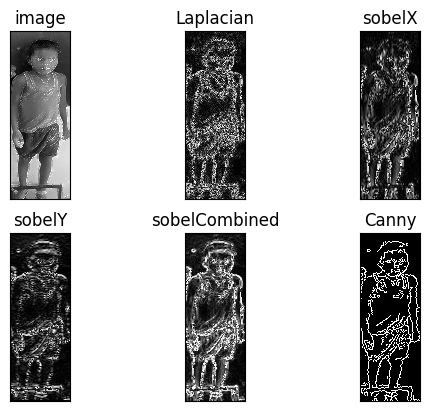

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/enhanced_image_2.jpg", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,100,200)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

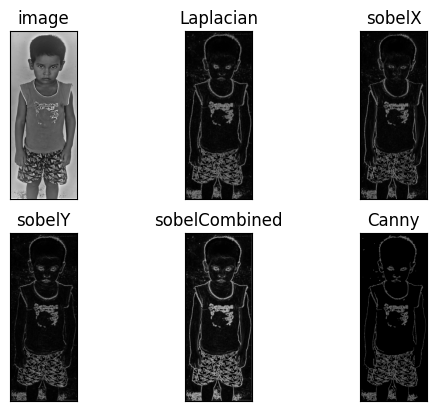

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/crooped.jpg", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,50,250)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

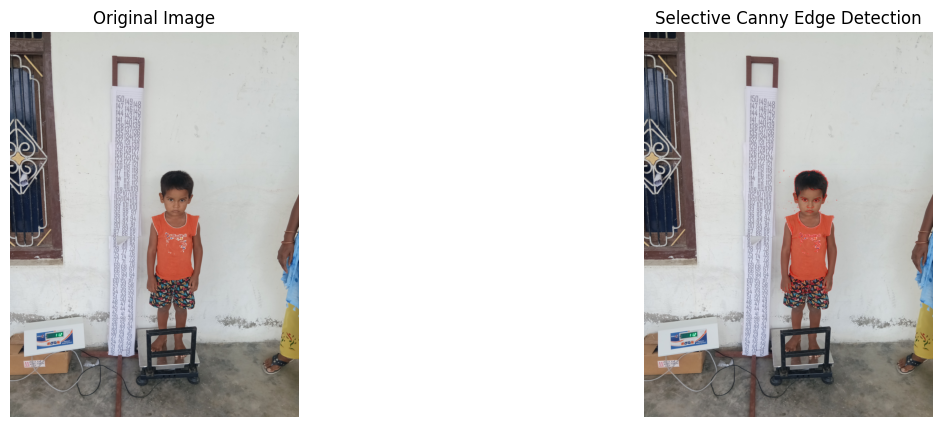

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def selective_canny_edge(image_path, xmin, ymin, xmax, ymax):
    # Load the image
    image = cv2.imread(image_path)

    # Create a mask to preserve the target object (foreground)
    mask = np.zeros_like(image[:, :, 0], dtype=np.uint8)
    mask[ymin:ymax, xmin:xmax] = 1

    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection to the grayscale image
    edges = cv2.Canny(grayscale_image, threshold1=30, threshold2=100)

    # Extract edges within the bounding box
    edges_in_bbox = edges[ymin:ymax, xmin:xmax]

    # Create a mask for the edges
    edge_mask = np.zeros_like(grayscale_image, dtype=np.uint8)
    edge_mask[ymin:ymax, xmin:xmax] = edges_in_bbox

    # Apply the edge mask to the original image
    result_image = image.copy()
    result_image[edge_mask == 255] = [0, 0, 255]  # Set the edge pixels to red (you can adjust the color)

    return result_image

# Replace 'input_image.jpg' with the path to your image file
input_image_path = "/content/2023-07-12_IMG_1689149247587.jpg"

# Bounding box coordinates from LabelImg
xmin, ymin, xmax, ymax = 1406, 1430, 2036, 2738

# Perform selective Canny edge detection and crop
result_image = selective_canny_edge(input_image_path, xmin, ymin, xmax, ymax)

# Display the original and selectively edge-detected images using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")
ax1.axis("off")

ax2.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Selective Canny Edge Detection")
ax2.axis("off")

plt.show()
